# Indicadores de finanzas municipales

Diciembre, 2021

En este notebook se derivan varios indicadores financieros y presupuestarios de los municipios.

In [1]:
# Library setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
url = "http://fiscal.funde.org:8080"

## Definiciones y carga de datos

In [2]:
keys = [
    {
        "key": "GTOING", "label" : "Razón entre gastos e ingresos propios", "category": "ratio", "scale": "linear",
        "note": "¿Cuánto dólares se gastan por cada dólar que una alcaldía recibe como ingresos propios?"
    },
    {
        "key": "INVGTO", "label" : "Razón entre inversión y gastos", "category": "ratio", "scale": "linear",
        "note": "¿Cuántos dólares se invierten por cada dólar que una alcaldía gasta"
    },
    {
        "key": "DEUING", "label" : "Razón entre deuda e ingresos propios", "category": "ratio", "scale": "linear",
        "node": "¿Cuántos dólares se deben por cada dólar que una alcaldía recibe como ingresos propios? ¿En cuántos años se liquidarán las deudas si todos los ingresos propios se usarán para pagarlas?"
    },
    {
        "key": "DEPTRF", "label" : "Dependencia de las transferencias", "category": "ratio", "scale": "linear",
        "note": "¿Qué proporción de las transferencias que recibe una alcaldía se usan para cubrir los gastos y las inversiones?"
    },
    {
        "key": "DEPDEU", "label" : "Dependencia del endeudamiento", "category": "ratio", "scale": "linear",
        "note": "¿Qué proporción de las deudas que se consiguen en el año se usan para cubrir los gastos y las inversiones?"
    },
    {
        "key": "INGPRP", "label" : "Ingresos propios (USD)", "category": "revenue", "scale": "log",
        "note": "Cuánto dinero recibe la alcaldía en concepto de impuestos, tasas y otros ingresos propios?"
    },
    {
        "key": "ICTESP", "label" : "Ingresos por contribuciones especiales (USD)", "category": "revenue", "scale": "log",
        "note": "¿Qué cantidad de los ingresos tienen un destino predeterminado?"
    },
    {
        "key": "TRFREC", "label" : "Transferencias recibidas (USD)", "category": "revenue", "scale": "log",
        "note": "¿Cuánto recibe la alcaldía de transferencias del gobierno central y de otras fuentes?"
    },   
    {
        "key": "INGDEU", "label" : "Endeudamiento (USD)", "category": "revenue", "scale": "log",
        "note": "¿Cuál es el monto de la deuda contratada por una alcaldía en el año?"
    },
    {
        "key": "GASTOS", "label" : "Gastos (USD)", "category": "expenses", "scale": "log",
        "note": "¿Cuánto destina una alcaldía para el pago de salarios, adquirir bienes y servicios y atender otros gastos?"
    },
    {
        "key": "INVERS", "label" : "Inversiones (USD)", "category": "expenses", "scale": "log",
        "note": "¿Cuánto destina una alcaldía para la construcción de obras y el financiamiento de otros proyectos de inversión?"
    },
    {
        "key": "AMTDEU", "label" : "Amortización de deudas (USD)", "category": "expenses", "scale": "log",
        "note": "¿Qué cantidad destina una alcaldía en un año para abonar capital a sus deudas?"
    },
    {
        "key": "EGROTR", "label" : "Otros egresos (USD)", "category": "expenses", "scale": "log",
        "note": "¿Qué cantidad usa una alcadlía para atender otros egresos?"
    },
    {"key": "FDINVF", "label" : "Fondos e inversiones financieras (USD)", "category": "assets", "scale": "log", "note": ""},
    {"key": "EXISBU", "label" : "Existencias y bienes de uso (USD)", "category": "assets", "scale": "log", "note": ""},
    {"key": "INVPRY", "label" : "Inversiones en proyectos (USD)", "category": "assets", "scale": "log", "note": ""},
    {"key": "RECOTR", "label" : "Otros recursos (USD)", "category": "assets", "scale": "log", "note": ""},
    {"key": "OBLGCP", "label" : "Obligaciones de corto plazo (USD)", "category": "obligations", "scale": "log", "note": ""},
    {"key": "OBLGLP", "label" : "Obligciones de largo plazo (USD)", "category": "obligations", "scale": "log", "note": ""},
    {"key": "INGPRP_per", "label" : "Ingresos propios (USD/habitante)", "category": "revenue", "scale": "log", "note": ""},
    {"key": "ICTESP_per", "label" : "Ingresos por contribuciones especiales (USD/habitante)", "category": "revenue", "scale": "log", "note": ""},
    {"key": "TRFREC_per", "label" : "Transferencias recibidas (USD/habitante)", "category": "revenue", "scale": "log", "note": ""},
    {"key": "INGDEU_per", "label" : "Endeudamiento (USD/habitante)", "category": "revenue", "scale": "log", "note": ""},
    {"key": "GASTOS_per", "label" : "Gastos (USD/habitante)", "category": "expenses", "scale": "log", "note": ""},
    {"key": "INVERS_per", "label" : "Inversiones (USD/habitante)", "category": "expenses", "scale": "log", "note": ""},
    {"key": "AMTDEU_per", "label" : "Amortización de deudas (USD/habitante)", "category": "expenses", "scale": "log", "note": ""},
    {"key": "EGROTR_per", "label" : "Otros egresos (USD/habitante)", "category": "expenses", "scale": "log", "note": ""},
    {"key": "FDINVF_per", "label" : "Fondos e inversiones financieras (USD/habitante)", "category": "assets", "scale": "log", "note": ""},
    {"key": "EXISBU_per", "label" : "Existencias y bienes de uso (USD/habitante)", "category": "assets", "scale": "log", "note": ""},
    {"key": "INVPRY_per", "label" : "Inversiones en proyectos (USD/habitante)", "category": "assets", "scale": "log", "note": ""},
    {"key": "RECOTR_per", "label" : "Otros recursos (USD/habitante)", "category": "assets", "scale": "log", "note": ""},
    {"key": "OBLGCP_per", "label" : "Obligaciones de corto plazo (USD/habitante)", "category": "obligations", "scale": "log", "note": ""},
    {"key": "OBLGLP_per", "label" : "Obligaciones de largo plazo (USD/habitante)", "category": "obligations", "scale": "log", "note": ""},
]

In [3]:
[rec["key"] for rec in keys]

['GTOING',
 'INVGTO',
 'DEUING',
 'DEPTRF',
 'DEPDEU',
 'INGPRP',
 'ICTESP',
 'TRFREC',
 'INGDEU',
 'GASTOS',
 'INVERS',
 'AMTDEU',
 'EGROTR',
 'FDINVF',
 'EXISBU',
 'INVPRY',
 'RECOTR',
 'OBLGCP',
 'OBLGLP',
 'INGPRP_per',
 'ICTESP_per',
 'TRFREC_per',
 'INGDEU_per',
 'GASTOS_per',
 'INVERS_per',
 'AMTDEU_per',
 'EGROTR_per',
 'FDINVF_per',
 'EXISBU_per',
 'INVPRY_per',
 'RECOTR_per',
 'OBLGCP_per',
 'OBLGLP_per']

In [4]:
dataPath = "../res/data/"
budget = pd.read_csv(dataPath + "mun-budget-year-header.csv")
contab = pd.read_csv(dataPath + "mun-contab-year-header.csv")
len(budget), len(contab)

(120816, 81550)

In [5]:
budget.head()

,year,muni_contab_id,object,class,amount
0,2010,8101,11,ACR,1.007948e+06
1,2010,8101,11,APR,1.191000e+06
2,2010,8101,11,MOD,1.191000e+06
3,2010,8101,12,ACR,1.519010e+06
4,2010,8101,12,APR,1.599400e+06


In [6]:
contab.head()

,year,muni_contab_id,account,amount
0,2010,8101,211,6.143657e+05
1,2010,8101,212,3.498976e+04
2,2010,8101,213,5.788516e+05
3,2010,8101,222,4.721059e+04
4,2010,8101,225,2.575379e+06


## Preprocesamiento

### Agrupación presupuestaria

Los egresos se agrupan en las siguientes categorías:

- Gastos
- Inversiones
- Amortización de deudas

Los ingresos se agrupan en:

- Ingresos propios
- Contribuciones especiales
- Transferencias recibidas
- Endeudamiento

In [7]:
def groupBudget(obj):
    if obj >= 50:
        kind = "Egresos"
        if obj >= 50 and obj < 60:
            return kind, "GASTOS"
        elif obj >= 60 and obj < 70:
            return kind, "INVERS"
        elif obj >= 70 and obj < 80:
            return kind, "AMTDEU"
        else:
            return kind, "EGROTR"
    else:
        kind = "Ingresos"
        if obj == 16 or obj == 22:
            return kind, "TRFREC"
        elif obj == 31:
            return kind, "INGDEU"
        elif obj == 41:
            return kind, "ICTESP"
        else:
            return kind, "INGPRP"

In [8]:
for i in range(len(budget)):
    rec = budget.iloc[i]
    kind, group = groupBudget(rec["object"])
    budget.at[i, "kind"] = kind
    budget.at[i, "group"] = group

In [9]:
budgetGrouped = budget.groupby(["year", "muni_contab_id", "class", "kind", "group"])\
    .sum()["amount"].reset_index()
budgetGrouped.head()

,year,muni_contab_id,class,kind,group,amount
0,2010,8101,ACR,Egresos,AMTDEU,1.748385e+05
1,2010,8101,ACR,Egresos,GASTOS,3.472434e+06
2,2010,8101,ACR,Egresos,INVERS,2.099882e+06
3,2010,8101,ACR,Ingresos,INGDEU,1.000000e+05
4,2010,8101,ACR,Ingresos,INGPRP,2.730930e+06


In [10]:
budgetGrouped.rename(columns={"muni_contab_id": "contab"}, inplace=True)

### Agrupación contable

Los recursos se agrupan en:

- Fondos e inversiones financieras
- Existencias y bienes de uso
- Inversiones en proyectos

Las obligaciones se agrupan en:

- Obligaciones de corto plazo
- Deuda de largo plazo

In [11]:
def groupContab(acc):
    acc = str(acc)
    if acc >= "200" and acc < "400":
        kind = "Recursos"
        acc = acc[:2]
        if acc == "21" or acc == "22":
            return kind, "FDINVF"
        elif acc == "23" or acc == "24":
            return kind, "EXISBU"
        elif acc == "25":
            return kind, "INVPRY"
        else:
            return kind, "RECOTR"
    else:
        kind = "Obligaciones"
        acc = acc[:2]
        if acc == "41":
            return kind, "OBLGCP"
        else:
            return kind, "OBLGLP"

In [12]:
for i in range(len(contab)):
    rec = contab.iloc[i]
    kind, group = groupContab(rec["account"])
    contab.at[i, "kind"] = kind
    contab.at[i, "group"] = group

In [13]:
contabGrouped = contab.groupby(["year", "muni_contab_id", "kind", "group"]).sum()["amount"].reset_index()
contabGrouped.head()

,year,muni_contab_id,kind,group,amount
0,2010,8101,Obligaciones,OBLGCP,2.172875e+05
1,2010,8101,Obligaciones,OBLGLP,3.311050e+07
2,2010,8101,Recursos,EXISBU,1.785698e+07
3,2010,8101,Recursos,FDINVF,3.865648e+06
4,2010,8101,Recursos,INVPRY,5.890917e+04


In [14]:
contabGrouped.rename(columns={"muni_contab_id": "contab"}, inplace=True)

## Cálculo de indicadores

In [15]:
# Data structure to save indicators datasets

indicadators = {}
df = pd.concat([
    budgetGrouped[budgetGrouped["class"] == "ACR"],
    contabGrouped
])
df = df.pivot(
    index=["year", "contab"],
    columns="group",
    values="amount"
).reset_index()

In [16]:
df.columns

Index(['year', 'contab', 'AMTDEU', 'EGROTR', 'EXISBU', 'FDINVF', 'GASTOS',
       'ICTESP', 'INGDEU', 'INGPRP', 'INVERS', 'INVPRY', 'OBLGCP', 'OBLGLP',
       'TRFREC'],
      dtype='object', name='group')

In [17]:
def plotIndicator(df, key, log=False):
    for year in df.year.unique():
        sub = df[df["year"] == year]
        y = sub[key].values
        if log:
            y = np.log10(y[y != 0])
        plt.plot(range(len(y)), np.sort(y)) 

### Relación entre gastos e ingresos propios

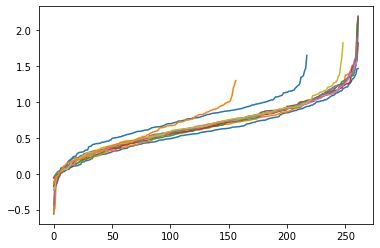

In [18]:
key = "GTOING"
df[key] = df["GASTOS"] / df["INGPRP"]
plotIndicator(df, key, log=True)

### Relación entre inversión y gastos

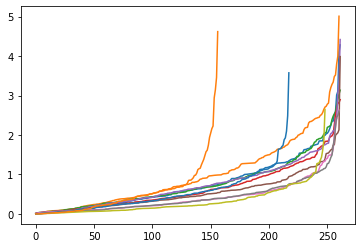

In [19]:
key = "INVGTO"
df[key] = df["INVERS"] / df["GASTOS"]
plotIndicator(df, key)

### Relación entre deuda e ingresos propios

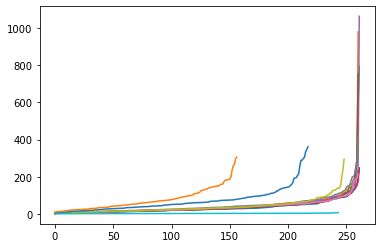

In [20]:
key = "DEUING"
df[key] = df["OBLGLP"] / df["INGPRP"]
plotIndicator(df, key)

### Dependencia de las transferencias

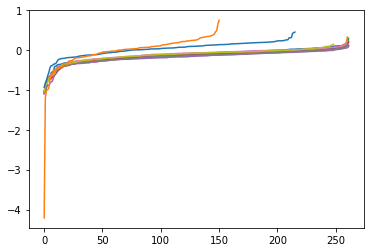

In [21]:
key = "DEPTRF"
df[key] = df["TRFREC"] / (df["GASTOS"] + df["INVERS"])
plotIndicator(df, key, log=True)

### Dependencia del endeudamiento

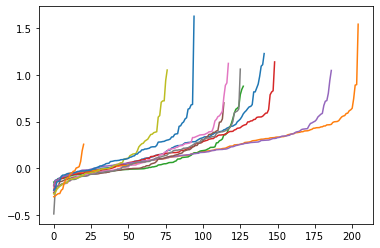

In [22]:
key = "DEPDEU"
df[key] = (df["INGDEU"] - df["AMTDEU"]) /  (df["GASTOS"] + df["INVERS"])
plotIndicator(df, key)

### Agregando otras variables

In [23]:
!pwd

/home/jailop/dev/cemif/notebooks


In [24]:
population = pd.read_csv("../data/bach1//supl/population.csv")
population.head()

,municipality,year,source,attribute,value
0,101,2007,censo2007,urb_hom,144217.0
1,102,2007,censo2007,urb_hom,52381.0
2,103,2007,censo2007,urb_hom,64509.0
3,104,2007,censo2007,urb_hom,111234.0
4,105,2007,censo2007,urb_hom,30782.0


In [25]:
population.attribute.unique()

array(['urb_hom', 'urb_muj', 'rur_hom', 'rur_muj', 'popurb', 'masc',
       'depend', 'sixtyeqgreater', 'tgf', 'tmi', 'analf', 'asistesc',
       'water', 'electricity', 'notoilet', 'dirtfloor'], dtype=object)

In [26]:
popTotal = pd.concat([
    population[population.attribute == "urb_hom"],
    population[population.attribute == "urb_muj"],
    population[population.attribute == "rur_hom"],
    population[population.attribute == "rur_muj"],
])
popTotal = popTotal.groupby("municipality").sum()["value"].reset_index()
popTotal.rename(columns={"municipality": "id", "value": "population"}, inplace=True)
popTotal.head()

,id,population
0,101,316090.0
1,102,120200.0
2,103,140751.0
3,104,241403.0
4,105,66400.0


In [30]:
municipalities = pd.read_json(url + "/api/v2/municipalities")
municipalities.head()

,id,shp,contab,department,municipality,address,phone,email,url,km2
0,603,227,8301,Sonsonate,Acajutla,"Calle Principal, Barrio Las Peñas",2429-7300\n2429-7327\n2429-7331,,,166.59
1,910,22,8401,Chalatenango,Agua Caliente,"1a Avenida Norte Barrio El Centro, Agua Caliente",2309-7700,,,195.74
2,112,179,8601,San Salvador,Aguilares,Costado Poniente del parque municipal,2327-5100,,,33.72
3,1101,1,8101,Ahuachapán,Ahuachapán,"3a. Calle Pte. y 2a Av. Sur, frente al parque ...",2487-4800,,,244.84
4,512,243,9101,Usulután,Alegría,Barrio El Centro frente a parque municipal,2668-5600 \n2668-5602 \n2628-1143,,,40.41


In [31]:
df = df.merge(
    municipalities[["id", "shp", "contab", "department", "municipality"]], 
    on="contab"
)
df = df.merge(popTotal, on="id")
df

,year,contab,AMTDEU,EGROTR,EXISBU,FDINVF,GASTOS,ICTESP,INGDEU,INGPRP,...,GTOING,INVGTO,DEUING,DEPTRF,DEPDEU,id,shp,department,municipality,population
0,2010,8101,1.748385e+05,NaN,1.785698e+07,3.865648e+06,3.472434e+06,NaN,1.000000e+05,2.730930e+06,...,1.271520,0.604729,12.124257,0.512006,-0.013430,1101,1,Ahuachapán,Ahuachapán,110511.0
1,2011,8101,1.075870e+06,NaN,1.784860e+07,4.384201e+06,3.836138e+06,NaN,1.122255e+06,2.841217e+06,...,1.350174,0.447227,11.845201,0.448979,0.008355,1101,1,Ahuachapán,Ahuachapán,110511.0
2,2012,8101,1.100014e+05,NaN,1.814108e+07,4.291781e+06,4.020159e+06,NaN,2.564927e+05,2.944718e+06,...,1.365210,0.538954,12.997602,0.432135,0.023678,1101,1,Ahuachapán,Ahuachapán,110511.0
3,2013,8101,2.266375e+05,NaN,1.382478e+07,6.604323e+06,4.453212e+06,NaN,7.435073e+05,3.803865e+06,...,1.170707,0.634743,11.900664,0.434734,0.071000,1101,1,Ahuachapán,Ahuachapán,110511.0
4,2014,8101,2.619902e+05,NaN,1.648256e+07,6.130096e+06,4.549759e+06,NaN,8.810233e+05,3.872705e+06,...,1.174827,0.712124,10.236684,0.402469,0.079468,1101,1,Ahuachapán,Ahuachapán,110511.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,2016,9418,7.914547e+04,NaN,2.946028e+05,7.356175e+05,5.933959e+05,NaN,3.250000e+05,1.350516e+05,...,4.393845,0.704460,36.610163,1.097674,0.243079,710,132,La Unión,Yucuaiquín,6799.0
2960,2017,9418,9.489671e+04,NaN,2.864100e+05,4.174067e+05,8.957238e+05,NaN,NaN,1.266270e+05,...,7.073719,0.558361,48.991731,0.759228,NaN,710,132,La Unión,Yucuaiquín,6799.0
2961,2018,9418,1.043895e+05,NaN,3.042648e+05,2.084495e+05,7.206439e+05,NaN,NaN,9.918722e+04,...,7.265491,0.806611,52.467222,0.819745,NaN,710,132,La Unión,Yucuaiquín,6799.0
2962,2019,9418,NaN,NaN,2.960940e+05,4.072852e+05,NaN,NaN,NaN,2.002816e+06,...,NaN,NaN,2.118282,NaN,NaN,710,132,La Unión,Yucuaiquín,6799.0


## Indicadoeres por población

In [32]:
ind = [
    'INGPRP',
    'ICTESP',
    'TRFREC',
    'INGDEU',
    'GASTOS',
    'INVERS',
    'AMTDEU',
    'EGROTR',
    'FDINVF',
    'EXISBU',
    'INVPRY',
    'OBLGCP',
    'OBLGLP',
]
for el in ind:
    df[el + "_per"] = df[el] / df["population"]

### Salvando los indicadores

In [33]:
df.head()

,year,contab,AMTDEU,EGROTR,EXISBU,FDINVF,GASTOS,ICTESP,INGDEU,INGPRP,...,INGDEU_per,GASTOS_per,INVERS_per,AMTDEU_per,EGROTR_per,FDINVF_per,EXISBU_per,INVPRY_per,OBLGCP_per,OBLGLP_per
0,2010,8101,1.748385e+05,NaN,1.785698e+07,3.865648e+06,3.472434e+06,NaN,1.000000e+05,2.730930e+06,...,0.904887,31.421610,19.001566,1.582091,NaN,34.979756,161.585585,0.533062,1.966207,299.612707
1,2011,8101,1.075870e+06,NaN,1.784860e+07,4.384201e+06,3.836138e+06,NaN,1.122255e+06,2.841217e+06,...,10.155143,34.712723,15.524474,9.735409,NaN,39.672074,161.509750,0.768574,2.270203,304.537922
2,2012,8101,1.100014e+05,NaN,1.814108e+07,4.291781e+06,4.020159e+06,NaN,2.564927e+05,2.944718e+06,...,2.320970,36.377908,19.606006,0.995389,NaN,38.835785,164.156296,-0.000002,2.374771,346.339027
3,2013,8101,2.266375e+05,NaN,1.382478e+07,6.604323e+06,4.453212e+06,NaN,7.435073e+05,3.803865e+06,...,6.727903,40.296551,25.577946,2.050814,NaN,59.761680,125.098678,4.798642,2.983656,409.629048
4,2014,8101,2.619902e+05,NaN,1.648256e+07,6.130096e+06,4.549759e+06,NaN,8.810233e+05,3.872705e+06,...,7.972267,41.170188,29.318275,2.370716,NaN,55.470464,149.148593,10.201227,5.811856,358.730396


In [34]:
df.columns

Index(['year', 'contab', 'AMTDEU', 'EGROTR', 'EXISBU', 'FDINVF', 'GASTOS',
       'ICTESP', 'INGDEU', 'INGPRP', 'INVERS', 'INVPRY', 'OBLGCP', 'OBLGLP',
       'TRFREC', 'GTOING', 'INVGTO', 'DEUING', 'DEPTRF', 'DEPDEU', 'id', 'shp',
       'department', 'municipality', 'population', 'INGPRP_per', 'ICTESP_per',
       'TRFREC_per', 'INGDEU_per', 'GASTOS_per', 'INVERS_per', 'AMTDEU_per',
       'EGROTR_per', 'FDINVF_per', 'EXISBU_per', 'INVPRY_per', 'OBLGCP_per',
       'OBLGLP_per'],
      dtype='object')

In [35]:
out = df.melt(
    id_vars=["year", "id", "shp", "contab", "department", "municipality", "population"],
    value_vars=['AMTDEU', 'EGROTR', 'EXISBU', 'FDINVF', 'GASTOS',
       'ICTESP', 'INGDEU', 'INGPRP', 'INVERS', 'INVPRY', 'OBLGCP', 'OBLGLP',
       'TRFREC', 'GTOING', 'INVGTO', 'DEUING', 'DEPTRF', 'DEPDEU', 'INGPRP_per', 'ICTESP_per',
       'TRFREC_per', 'INGDEU_per', 'GASTOS_per', 'INVERS_per', 'AMTDEU_per',
       'EGROTR_per', 'FDINVF_per', 'EXISBU_per', 'INVPRY_per', 'OBLGCP_per',
       'OBLGLP_per'],
    var_name="group", 
    value_name="value"
)
out["id"] = out["id"].apply(lambda v: str(v).zfill(4))

In [36]:
out = out[out["value"].isna() == False]
len(out)

72976

In [37]:
out.to_csv(dataPath + "muni-indicators.csv", index=False)

In [38]:
pd.DataFrame(keys).to_csv(dataPath + "muni-indicators-keys.csv", index=False)

## Indicadores globales

In [39]:
out.head()

,year,id,shp,contab,department,municipality,population,group,value
0,2010,1101,1,8101,Ahuachapán,Ahuachapán,110511.0,AMTDEU,1.748385e+05
1,2011,1101,1,8101,Ahuachapán,Ahuachapán,110511.0,AMTDEU,1.075870e+06
2,2012,1101,1,8101,Ahuachapán,Ahuachapán,110511.0,AMTDEU,1.100014e+05
3,2013,1101,1,8101,Ahuachapán,Ahuachapán,110511.0,AMTDEU,2.266375e+05
4,2014,1101,1,8101,Ahuachapán,Ahuachapán,110511.0,AMTDEU,2.619902e+05


### Razón entre gastos e ingresos

In [40]:
country = out.groupby(["group", "year"]).median()["value"].reset_index()

In [41]:
country[country.year == 2020].to_csv("../res/data/muni-indicators-global.csv", index=False)